In [1]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting

In [102]:
!pip install zipcodes # installing Zipcodes library .

     |████████████████████████████████| 719 kB 14.3 MB/s eta 0:00:01


In [3]:
df = pd.read_csv('/Users/swapnilthorat/Desktop/Study/consumer_complaints_project/complaints.csv')

/Users/swapnilthorat/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.shape

(2586668, 18)

In [5]:
list(df.columns)

['Date received',
 'Product',
 'Sub-product',
 'Issue',
 'Sub-issue',
 'Consumer complaint narrative',
 'Company public response',
 'Company',
 'State',
 'ZIP code',
 'Tags',
 'Consumer consent provided?',
 'Submitted via',
 'Date sent to company',
 'Company response to consumer',
 'Timely response?',
 'Consumer disputed?',
 'Complaint ID']

In [6]:
df.head(2).T 

,0,1
Date received,2022-03-31,2022-02-02
Product,Debt collection,"Credit reporting, credit repair services, or o..."
Sub-product,I do not know,Credit reporting
Issue,Attempts to collect debt not owed,Problem with a credit reporting company's inve...
Sub-issue,Debt is not yours,Investigation took more than 30 days
Consumer complaint narrative,NaN,NaN
Company public response,NaN,Company has responded to the consumer and the ...
Company,ENCORE CAPITAL GROUP INC.,"TRANSUNION INTERMEDIATE HOLDINGS, INC."
State,SC,NY
ZIP code,29020.0,12919.0


Text(0.5, 0, 'Number of ocurrences')

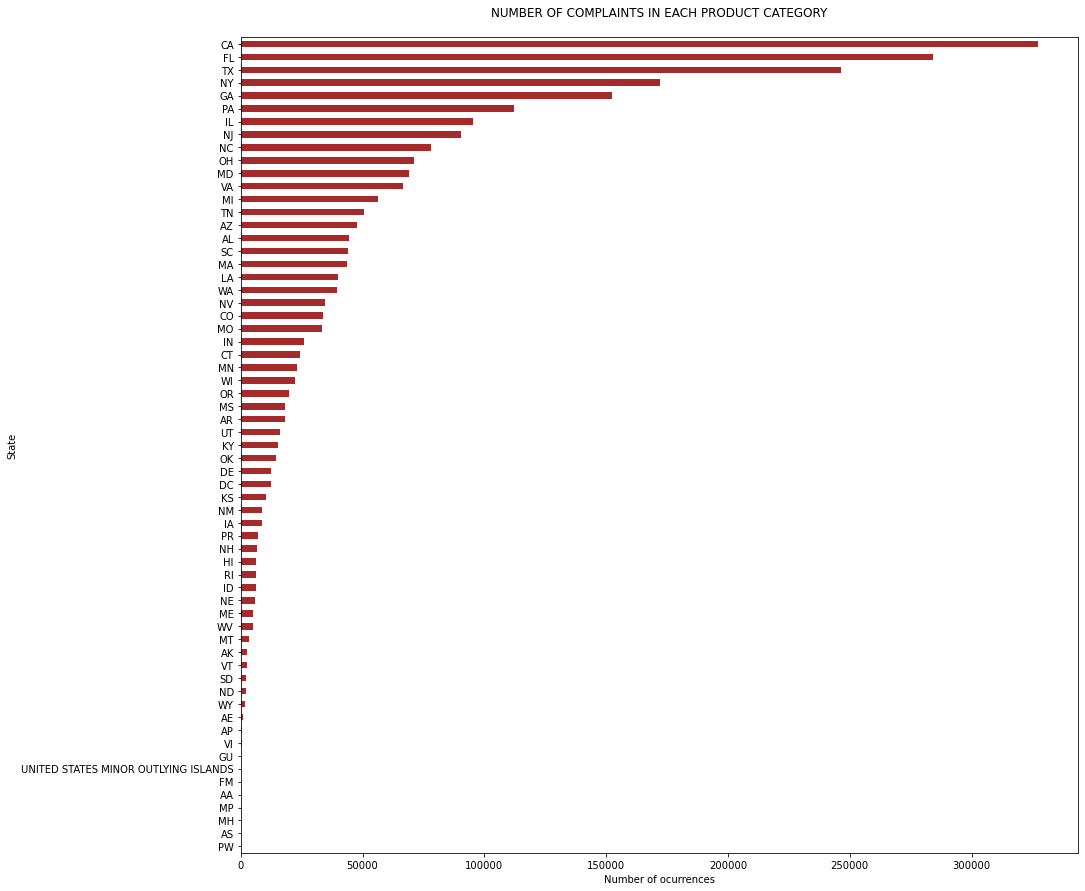

In [7]:
fig = plt.figure(figsize=(15,15))
df.groupby(['State'])['Complaint ID'].count().sort_values().plot.barh(
    ylim=0, color='brown', title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10)

In [8]:
# California has the highest number of complaints as compared to others. Let's see what are these complaints about.

In [9]:
df[df['State'] == 'CA']['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    115409
Mortgage                                                                         57929
Debt collection                                                                  48955
Credit card or prepaid card                                                      20822
Credit reporting                                                                 18119
Checking or savings account                                                      17040
Credit card                                                                      12318
Bank account or service                                                          12164
Student loan                                                                      6854
Money transfer, virtual currency, or money service                                5276
Consumer Loan                                                                     3797
Vehicle loan or lease                      

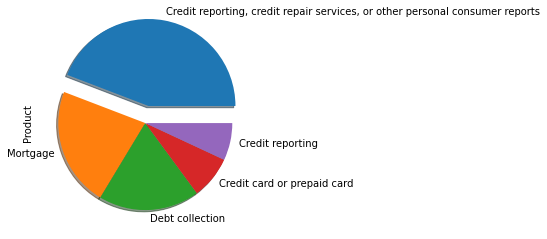

In [10]:
df[df['State'] == 'CA']['Product'].value_counts().head(5).plot.pie(explode=[0.2,0,0,0,0],shadow=True)
# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

In [11]:
df[df['State'] == 'CA']['Issue'].value_counts().head(10)

Incorrect information on your report                                                72771
Problem with a credit reporting company's investigation into an existing problem    28879
Loan modification,collection,foreclosure                                            22282
Attempts to collect debt not owed                                                   15159
Incorrect information on credit report                                              12994
Loan servicing, payments, escrow account                                            11195
Improper use of your report                                                         11149
Managing an account                                                                 10776
Cont'd attempts collect debt not owed                                                8454
Trouble during payment process                                                       7655
Name: Issue, dtype: int64

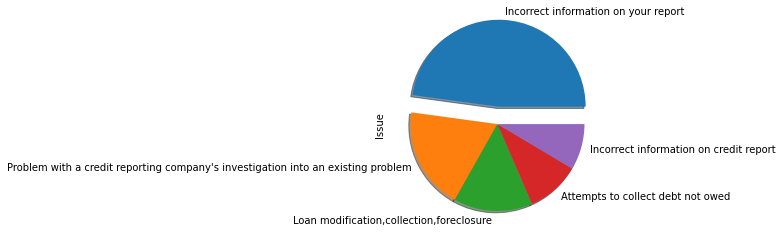

In [12]:
df[df['State'] == 'CA']['Issue'].value_counts().head(5).plot.pie(explode=[0.2,0,0,0,0],shadow=True)
# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

In [13]:
p_product_discussions = round(df["Product"].value_counts() / len(df["Product"]) * 100,2)
print(p_product_discussions)

Credit reporting, credit repair services, or other personal consumer reports    40.14
Debt collection                                                                 16.10
Mortgage                                                                        13.58
Credit reporting                                                                 5.43
Credit card or prepaid card                                                      5.43
Checking or savings account                                                      4.58
Credit card                                                                      3.45
Bank account or service                                                          3.33
Student loan                                                                     2.56
Money transfer, virtual currency, or money service                               1.50
Vehicle loan or lease                                                            1.24
Consumer Loan                                         

In [14]:
!pip install plotly==5.7.0

In [15]:
import plotly.graph_objs as go

In [16]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [17]:
# various product types.

In [18]:
labels = list(p_product_discussions.index)
values = p_product_discussions.values.tolist()
colors = ['#F78181', '#F5A9BC', '#2E9AFE', '#58FA58', '#FAAC58', '#088A85', '#8A0808', '#848484', '#F781F3', '#D7DF01', '#2E2EFE']

import plotly.graph_objs as go
product_pie = go.Pie(labels=labels, values=values, 
                          marker=dict(colors=colors,
                         line=dict(color='#000000', width=2)))

layout = go.Layout(title='Product Types')

fig = go.Figure(data=[product_pie], layout=layout)
iplot(fig)

In [21]:
import plotly.tools as tls

In [22]:
disputed = df['Consumer disputed?'].value_counts()
company_response = df['Company response to consumer'].value_counts()
top5_disputed = df['Company'].loc[df['Consumer disputed?'] == 'Yes'].value_counts()[:5]
top5_nodispute = df['Company'].loc[df['Consumer disputed?'] == 'No'].value_counts()[:5]

In [23]:
total_complaints_plotly = go.Bar(
            x=disputed.index.values,
            y=disputed.values,
    text = 'Complaints',
    showlegend=False,
    marker=dict(
        color=['#40FF00', '#FF0000'])
    )

top5_disputes_plotly = go.Bar(
            x=top5_disputed.index.values,
            y=top5_disputed.values,
    text='Disputes',
    showlegend=False,
    marker=dict(
        color=top5_disputed.values,
        colorscale='Reds')
    )

top5_nodisputes_plotly = go.Bar(
            x=top5_nodispute.index.values,
            y=top5_nodispute.values,
    text='No Disputes',
    showlegend=False,
    marker=dict(
        color=top5_nodispute.values,
        colorscale='Blues')
    )

# Lower Subplot
customer_res_plotly = go.Bar(
            x=company_response.index.values,
            y=company_response.values,
    text='Customer Response',
    showlegend=False,
        marker=dict(
        color=df['Company response to consumer'].value_counts().values,
        colorscale = [[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'], 
                      [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], 
                      [0.5555555555555556, 'rgb(224,243,248)'], [0.6666666666666666, 'rgb(171,217,233)'], 
                      [0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'], 
                      [1.0, 'rgb(49,54,149)']],
        reversescale = True
        )
)

fig = tls.make_subplots(rows=2, cols=3, specs=[[{}, {}, {}], [{'colspan': 3}, None, None]],
                          subplot_titles=('Did the Customer Disputed?',
                                          'Disputes',
                                         'No Disputes',
                                         'Company response to consumer'))

# First three Subplots
fig.append_trace(total_complaints_plotly, 1, 1)
fig.append_trace(top5_disputes_plotly , 1, 2)
fig.append_trace(top5_nodisputes_plotly , 1, 3)

# Lower Subplot
fig.append_trace(customer_res_plotly, 2, 1)



fig['layout'].update(showlegend=True, height=1000, width=1000, title='Sectors')
iplot(fig, filename='Complaints')

/Users/swapnilthorat/opt/anaconda3/lib/python3.8/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [24]:
df['Date received'] = pd.to_datetime(df['Date received'])
df['year_received'], df['month_received'] = df['Date received'].dt.year, df['Date received'].dt.month
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,year_received,month_received
0,2022-03-31,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,ENCORE CAPITAL GROUP INC.,SC,29020.0,NaN,NaN,Web,2022-03-31,Closed with explanation,Yes,NaN,5392247,2022,3
1,2022-02-02,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,12919.0,NaN,Consent not provided,Web,2022-02-02,Closed with non-monetary relief,Yes,NaN,5177559,2022,2
2,2022-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",WA,98056.0,NaN,NaN,Web,2022-03-14,Closed with explanation,Yes,NaN,5321616,2022,3
3,2022-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,NaN,"EQUIFAX, INC.",GA,31909.0,NaN,NaN,Web,2022-03-14,Closed with explanation,Yes,NaN,5319887,2022,3
4,2022-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",OH,44133.0,NaN,Other,Web,2022-03-14,Closed with explanation,Yes,NaN,5320509,2022,3


In [25]:
# Create a Line Plot by the top 5 companies  by year who had more customer interaction cases (Disputes and No Disputes)
sorting_groups = df.groupby(['year_received', 'Consumer disputed?'])['Company'].apply(lambda x: x.value_counts())
d = {'CRM': sorting_groups}


In [26]:
year_crm = pd.DataFrame(data=d).reset_index()
year_crm.sort_values(by='CRM', ascending=False)

crm_df = year_crm.rename(columns={"level_2": "Company"})

In [27]:
print(crm_df)

       year_received Consumer disputed?  \
0               2011                 No   
1               2011                 No   
2               2011                 No   
3               2011                 No   
4               2011                 No   
...              ...                ...   
18232           2017                Yes   
18233           2017                Yes   
18234           2017                Yes   
18235           2017                Yes   
18236           2017                Yes   

                                     Company  CRM  
0      BANK OF AMERICA, NATIONAL ASSOCIATION  431  
1                       JPMORGAN CHASE & CO.  298  
2                             CITIBANK, N.A.  255  
3          CAPITAL ONE FINANCIAL CORPORATION  201  
4                      WELLS FARGO & COMPANY  170  
...                                      ...  ...  
18232            Darnel Quick Recovery, Inc.    1  
18233            Seattle Service Bureau, Inc    1  
18234        Ri

In [28]:
crm_df.head()

,year_received,Consumer disputed?,Company,CRM
0,2011,No,"BANK OF AMERICA, NATIONAL ASSOCIATION",431
1,2011,No,JPMORGAN CHASE & CO.,298
2,2011,No,"CITIBANK, N.A.",255
3,2011,No,CAPITAL ONE FINANCIAL CORPORATION,201
4,2011,No,WELLS FARGO & COMPANY,170


In [29]:
df.groupby(['Company'])['Complaint ID'].count().sort_values(ascending=False).head(5)

Company
EQUIFAX, INC.                             411157
TRANSUNION INTERMEDIATE HOLDINGS, INC.    315288
Experian Information Solutions Inc.       293034
BANK OF AMERICA, NATIONAL ASSOCIATION     111489
WELLS FARGO & COMPANY                      95231
Name: Complaint ID, dtype: int64

In [31]:
dispute_presence = df.loc[df['Consumer disputed?'] == 'Yes']
cross_month = pd.crosstab(dispute_presence['State'], dispute_presence['Company']).apply(lambda x: x/x.sum() * 100)

In [32]:
# EQUIFAX, INC. has the highest number of complaints among all the other companies. Lets see where are these complains from.

In [33]:
#  Share of Most disputes for Bank of America.
df_Eq = pd.DataFrame(cross_month['EQUIFAX, INC.']).reset_index().sort_values(by="EQUIFAX, INC.", ascending=False).round(2)
df_Eq = df_Eq.rename(columns={'EQUIFAX, INC.': 'share of complaints'})

for col in df_Eq.columns:
    df_Eq[col] = df_Eq[col].astype(str)
    
    
scl = [[0.0, 'rgb(202, 202, 202)'],[0.2, 'rgb(253, 205, 200)'],[0.4, 'rgb(252, 169, 161)'],
            [0.6, 'rgb(247, 121, 108  )'],[0.8, 'rgb(255, 39, 39)'],[1.0, 'rgb(219, 0, 0)']]


df_Eq['text'] = "State Code: " + df_Eq['State'] + '<br>'


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_Eq['State'],
        z = df_Eq['share of complaints'], 
        locationmode = 'USA-states',
        text = df_Eq['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]

layout = dict(
    title = 'Most Complaints by State <br> EQUIFAX, INC.',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')


In [34]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,year_received,month_received
0,2022-03-31,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,ENCORE CAPITAL GROUP INC.,SC,29020.0,NaN,NaN,Web,2022-03-31,Closed with explanation,Yes,NaN,5392247,2022,3
1,2022-02-02,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,12919.0,NaN,Consent not provided,Web,2022-02-02,Closed with non-monetary relief,Yes,NaN,5177559,2022,2
2,2022-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",WA,98056.0,NaN,NaN,Web,2022-03-14,Closed with explanation,Yes,NaN,5321616,2022,3
3,2022-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,NaN,"EQUIFAX, INC.",GA,31909.0,NaN,NaN,Web,2022-03-14,Closed with explanation,Yes,NaN,5319887,2022,3
4,2022-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",OH,44133.0,NaN,Other,Web,2022-03-14,Closed with explanation,Yes,NaN,5320509,2022,3


In [35]:
df1 = df[['Product', 'Consumer complaint narrative']].copy()

In [36]:
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]

In [37]:
df1.columns = ['Product', 'Consumer_complaint']

In [38]:
df1.shape

(906080, 2)

In [39]:
total = df1['Consumer_complaint'].notnull().sum()
round((total/len(df)*100),1)

35.0

In [40]:
pd.DataFrame(df.Product.unique()).values

array([['Debt collection'],
       ['Credit reporting, credit repair services, or other personal consumer reports'],
       ['Checking or savings account'],
       ['Mortgage'],
       ['Credit card or prepaid card'],
       ['Vehicle loan or lease'],
       ['Payday loan, title loan, or personal loan'],
       ['Money transfer, virtual currency, or money service'],
       ['Student loan'],
       ['Credit reporting'],
       ['Consumer Loan'],
       ['Bank account or service'],
       ['Credit card'],
       ['Money transfers'],
       ['Prepaid card'],
       ['Payday loan'],
       ['Other financial service'],
       ['Virtual currency']], dtype=object)

In [41]:
df2 = df1.sample(10000, random_state=1).copy()

In [42]:
df2.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

In [43]:
pd.DataFrame(df2.Product.unique())

,0
0,Debt collection
1,"Credit reporting, repair, or other"
2,Mortgage
3,Consumer Loan
4,Credit card or prepaid card
5,Checking or savings account
6,"Payday loan, title loan, or personal loan"
7,Student loan
8,Vehicle loan or lease
9,"Money transfer, virtual currency, or money ser..."


In [44]:
df2['category_id'] = df2['Product'].factorize()[0]

In [45]:
category_id_df = df2[['Product', 'category_id']].drop_duplicates()

In [46]:
category_to_id = dict(category_id_df.values)

In [47]:
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [48]:
df2.head()

,Product,Consumer_complaint,category_id
643725,Debt collection,I received a bill from XXXX XXXX after an emer...,0
911557,"Credit reporting, repair, or other",TransUnion consistently ( for TEN years! ) has...,1
1058589,"Credit reporting, repair, or other",I am writing this due to non-compliance with t...,1
1967987,"Credit reporting, repair, or other",The only names I have ever used are as followe...,1
2559710,Mortgage,Real Time Resolutions offered a settlement of ...,2


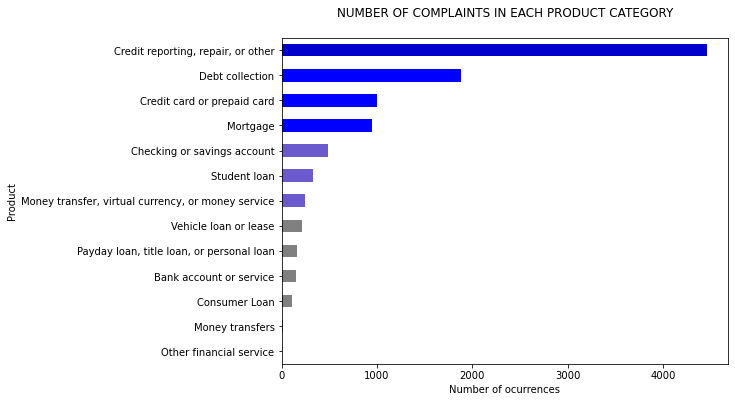

In [49]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey', 'slateblue','slateblue','slateblue','blue','blue','blue',
    'mediumblue','mediumblue','darkblue','darkblue', 'midnightblue']
df2.groupby('Product').Consumer_complaint.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [50]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

In [51]:
features = tfidf.fit_transform(df2.Consumer_complaint).toarray()

In [52]:
labels = df2.category_id

In [53]:
print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 10000 complaints is represented by 27734 features (TF-IDF score of unigrams and bigrams)


In [54]:
N = 3
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(Product))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Bank account or service:
  * Most Correlated Unigrams are: atm, citigold, overdraft
  * Most Correlated Bigrams are: 35 00, xxxx 35, overdraft fee

==> Checking or savings account:
  * Most Correlated Unigrams are: bank, deposited, deposit
  * Most Correlated Bigrams are: overdraft fees, savings account, checking account

==> Consumer Loan:
  * Most Correlated Unigrams are: argue, vehicle, nissan
  * Most Correlated Bigrams are: loan today, car payments, gm financial

==> Credit card or prepaid card:
  * Most Correlated Unigrams are: citi, amex, card
  * Most Correlated Bigrams are: annual fee, american express, credit card

==> Credit reporting, repair, or other:
  * Most Correlated Unigrams are: accounts, equifax, report
  * Most Correlated Bigrams are: credit reporting, identity theft, credit report

==> Debt collection:
  * Most Correlated Unigrams are: collect, collection, debt
  * Most Correlated Bigrams are: debt collector, collection agency, collect debt

==> Money transfe

In [55]:
X = df2['Consumer_complaint'] # Collection of documents
y = df2['Product'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [56]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [57]:
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/Users/swapnilthorat/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/Users/swapnilthorat/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/Users/swapnilthorat/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/Users/swapnilthorat/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/Users/swapnilthorat/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In [58]:
print(cv_df)

                model_name  fold_idx  accuracy
0   RandomForestClassifier         0    0.4475
1   RandomForestClassifier         1    0.4460
2   RandomForestClassifier         2    0.4460
3   RandomForestClassifier         3    0.4460
4   RandomForestClassifier         4    0.4475
5                LinearSVC         0    0.8075
6                LinearSVC         1    0.8075
7                LinearSVC         2    0.7930
8                LinearSVC         3    0.7880
9                LinearSVC         4    0.7930
10           MultinomialNB         0    0.6380
11           MultinomialNB         1    0.6280
12           MultinomialNB         2    0.6230
13           MultinomialNB         3    0.6355
14           MultinomialNB         4    0.6345
15      LogisticRegression         0    0.7850
16      LogisticRegression         1    0.7870
17      LogisticRegression         2    0.7765
18      LogisticRegression         3    0.7805
19      LogisticRegression         4    0.7820


In [59]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.7978,0.009087
LogisticRegression,0.7822,0.004071
MultinomialNB,0.6318,0.006150
RandomForestClassifier,0.4466,0.000822


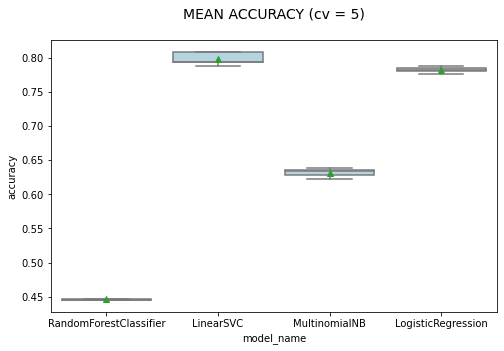

In [60]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [61]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df2.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [62]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df2['Product'].unique()))

				CLASSIFICATIION METRICS

                                                    precision    recall  f1-score   support

                                   Debt collection       0.80      0.77      0.78       507
                Credit reporting, repair, or other       0.83      0.91      0.87      1113
                                          Mortgage       0.83      0.93      0.88       212
                                     Consumer Loan       0.00      0.00      0.00        29
                       Credit card or prepaid card       0.70      0.72      0.71       251
                       Checking or savings account       0.57      0.68      0.62       111
         Payday loan, title loan, or personal loan       0.43      0.16      0.24        37
                                      Student loan       0.81      0.74      0.77        80
                             Vehicle loan or lease       0.53      0.42      0.47        50
Money transfer, virtual currency, or money service

/Users/swapnilthorat/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/swapnilthorat/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/swapnilthorat/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



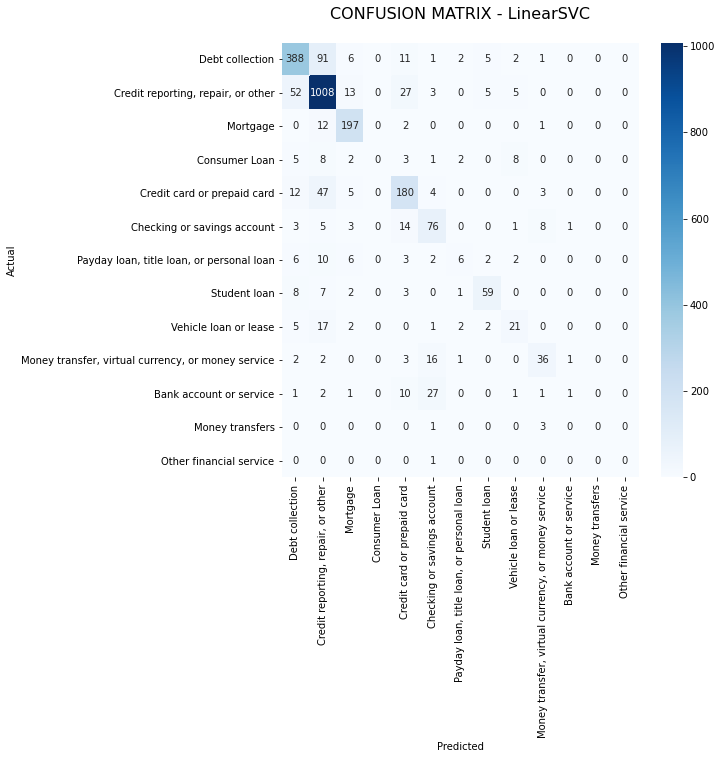

In [63]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Product.values, 
            yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In [64]:
model.fit(features, labels)

N = 4
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("\n==> '{}':".format(Product))
  print("  * Top unigrams: %s" %(', '.join(unigrams)))
  print("  * Top bigrams: %s" %(', '.join(bigrams)))


==> 'Bank account or service':
  * Top unigrams: bank, overdraft, citigold, chase
  * Top bigrams: overdraft fee, gave xxxx, xxxx 35, xxxx 15

==> 'Checking or savings account':
  * Top unigrams: bank, deposited, checking, funds
  * Top bigrams: debit card, overdraft fees, said fraud, xxxx number

==> 'Consumer Loan':
  * Top unigrams: argue, loan, vehicle, leased
  * Top bigrams: car payments, unable unwilling, gm financial, loan today

==> 'Credit card or prepaid card':
  * Top unigrams: card, amex, capital, charge
  * Top bigrams: balance transfer, late fee, available credit, credit limit

==> 'Credit reporting, repair, or other':
  * Top unigrams: equifax, experian, transunion, report
  * Top bigrams: xxxx xxxx, xxxx reported, authorized account, reporting agency

==> 'Debt collection':
  * Top unigrams: debt, collection, collect, company
  * Top bigrams: calls xxxx, verify debt, report ftc, request validation

==> 'Money transfer, virtual currency, or money service':
  * Top unig

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [66]:
new_complaint = """I have been enrolled back at Rutgers University University in the 05/01/2021. Recently, i have been harassed by \
Navient for the last month. I have faxed in paperwork providing them with everything they needed. And yet I am still getting \
phone calls for payments. Furthermore, Navient is now reporting to the credit bureaus that I am late. At this point, \
Navient needs to get their act together to avoid me taking further action. I have been enrolled the entire time and my \
deferment should be valid with my planned graduation date being the 05/16/2021."""
print(model.predict(fitted_vectorizer.transform([new_complaint])))

['Student loan']


In [67]:
new_complaint = """I have been enrolled back at Rutgers University University in the 05/01/2021. ..... At this point, \
Navient needs to get their act together to avoid me taking further action. I have been enrolled the entire time and my \
deferment should be valid with my planned graduation date being the 05/16/2021."""
print(model.predict(fitted_vectorizer.transform([new_complaint])))

['Student loan']


In [68]:
new_complaint_2 = """Equifax exposed my personal information without my consent, as part of their recent data breach. \
In addition, they dragged their feet in the announcement of the report, and even allowed their upper management to sell \
off stock before the announcement."""
print(model.predict(fitted_vectorizer.transform([new_complaint_2])))

['Credit reporting, repair, or other']
